In [1]:
#setup
import numpy as np
import matplotlib.pyplot as plt
from GrafTo.run import Grafting
import json
import subprocess
import os

# set path for putting files of new system

ROOT = os.getcwd() 
FOLDER = f"{ROOT}/MONO" 

# setting plotting parameters
plt.rcParams.update({"font.size": 12,"text.usetex": False,"mathtext.fontset": "stixsans"}) 

COLORS = {"water,K0":"xkcd:cornflower", "water,K1":"xkcd:algae green", "water,K2":"xkcd:raspberry", "water,K5":"xkcd:amber",
          "vacuum,K0":"xkcd:cornflower", "vacuum,K1":"xkcd:algae green", "vacuum,K2":"xkcd:raspberry", "vacuum,K5":"xkcd:amber",
          "toluene,K0":"xkcd:cornflower", "toluene,K1":"xkcd:algae green", "toluene,K2":"xkcd:raspberry", "toluene,K5":"xkcd:amber"}

MARKERS = {"water":"o", "vacuum":"s"}

/Users/frasera/Ricerca/PhD_Programs/.venv/lib/python3.8/site-packages/Bio/Application/__init__.py:40: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(



Creating fcc lattice
Dimensions: 20.047172182805397 20.102627813458138 2.014411934947645
a:0.7460784944250537, d1:0.5275571627054052, d2:0.2637785813527026, d3:0.45687790485132135

Creating fcc lattice
Dimensions: 20.047172182805397 20.102627813458138 2.014411934947645
a:0.7460784944250537, d1:0.5275571627054052, d2:0.2637785813527026, d3:0.45687790485132135


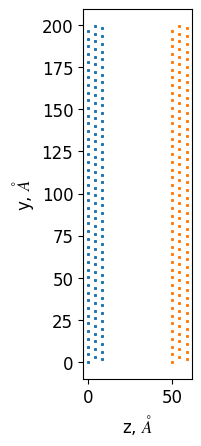

In [2]:
# Example to create a flat slab of 20x20x3 nm^3 to make piston

NewSystem = Grafting.NewSystem(root=FOLDER)
NewSystem.build_slab(outName=f"piston1.gro", atomNames=["PIS1","N1P"], Ns= [ 20, 20, 2 ], a=0.47*2**(1/6))
u = NewSystem.universe
pos1 = u.atoms.positions

NewSystem = Grafting.NewSystem(root=FOLDER)
NewSystem.build_slab(outName=f"piston2.gro", atomNames=["PIS2","N1P"], Ns= [ 20, 20, 2 ], a=0.47*2**(1/6))
u = NewSystem.universe
pos2 = u.atoms.positions

plt.scatter(pos1[:,2], pos1[:,1], s=0.1)
plt.scatter(pos2[:,2]+50, pos2[:,1], s=0.1)
plt.xlabel("z, $\AA$")
plt.ylabel("y, $\AA$")
plt.gca().set_aspect('equal')



Creating fcc lattice
Dimensions: 20.047172182805397 20.102627813458138 20.14411934947645
a:0.7460784944250537, d1:0.5275571627054052, d2:0.2637785813527026, d3:0.45687790485132135


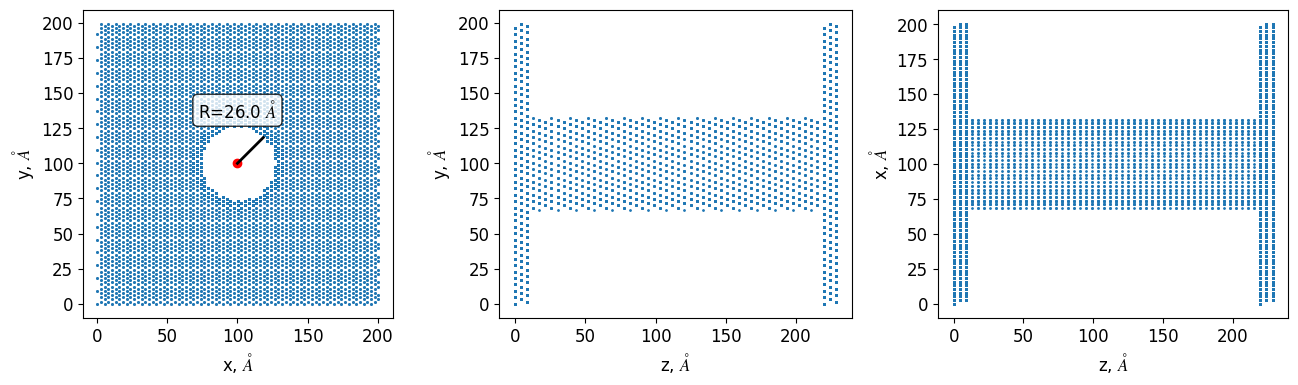

In [3]:
# Example to create a cylindrical surface (pore with radius of 2.6 nm in a block matrix of 20x20x20 nm^3)

NewSystem = Grafting.NewSystem(root=FOLDER)
NewSystem.build_slab(outName=f"block.gro", atomNames=["BULK","N1B"], Ns=[ 20, 20, 20 ], a=0.47*2**(1/6))

center, radius = [10,10], 2.6
NewSystem.make_cylindrical_pore(out_name="modified.gro", center=center, radius=radius, atomNames=["BULK","N1B"])
u = NewSystem.universe

pos = u.atoms.positions

fig, ax = plt.subplots(1,3, figsize=(16,4))
ax[0].scatter(pos[:,0], pos[:,1], s=1, alpha=1)
ax[0].set_xlabel("x, $\AA$")
ax[0].set_ylabel("y, $\AA$")
ax[0].scatter(center[0]*10, center[1]*10, c="red")
ax[0].plot([center[0]*10 ,center[0]*10+radius*10*np.cos(45*np.pi/180)], [center[1]*10, center[1]*10+radius*10*np.sin(45*np.pi/180)], ls="solid", lw=2, c="k", marker="none")
ax[0].set_aspect('equal')
ax[0].annotate(f"R={radius*10} $\AA$", np.array(center)*10+(0,30), ha="center", va="bottom", bbox=dict(facecolor='white', edgecolor='k', boxstyle='round', alpha=0.8))

ax[1].scatter(pos[:,2], pos[:,1], s=1, alpha=1)
ax[1].set_xlabel("z, $\AA$")
ax[1].set_ylabel("y, $\AA$")
ax[1].set_aspect('equal')

ax[2].scatter(pos[:,2], pos[:,0], s=1, alpha=1)
ax[2].set_xlabel("z, $\AA$")
ax[2].set_ylabel("x, $\AA$")
ax[2].set_aspect('equal')


In [4]:
#make input file

# Used for polydisperse cases
PDI = { "K0":1.3, "K1":1.3, "K2":1.3, "K5":1.35}
N = { "K0":15, "K1":72, "K2":88, "K5":308 }

# Used for monodisperse case
MOL_SIZE = 4

# If monodisperse, set 'monodisperse' to MOL_SIZE and 'polydisperse' to False
# If polydisperse, set 'polydisperse' to [PDI, N] and set 'monodisperse' to False

GRAFT_DENSITY, SAMPLE_NAME = 0.3, "MONO"
print(FOLDER)

data = {
    "folder": FOLDER,
    "surface_distance": 0.5,  # distance between chain beads, in nm
    "grafting_density": GRAFT_DENSITY,  # grafting density
    "perturbation":0, # intensity to perturbate atom positions randomly
    "name": SAMPLE_NAME,
    "matrix":
    {
        "file": f"{FOLDER}/modified.gro",  # path to matrix you wish to graft
        "size": False, #[ 50, 10, 9 ]  # if 'file' is set to False and [lx,ly,lz] is given to 'size', creates a flat slab with lx x ly x lz nm^3 dimensions
    },

    "grafting method":
    {
        "to": False,  # code is ready but not implemented, attaches pre built molecules to the surface
        "from": True  # grows from the surface
    },

    "chain dispersity":
    {
        "monodisperse": MOL_SIZE,
        "polydisperse": False # [ float(PDI[SAMPLE]) , int(N[SAMPLE]) ] for polydisperse
    },

    "atom names": {
        "polymer": ["SIL","C1"], # ["PDMS","DMS"] for PDMS
        "bulk":[ "BULK","N1B" ], 
        "layer":[ "LAY","N1L" ], 
        "under_polymer":[ "SIL","N1L1" ]  # ["PDMS", "N1L1"] for PDMS
    },

    "surface geometry": 
    {
        "cylindrical": True,
        "flat": False
    }
}

# save options to input file
with open(f'{ROOT}/Grafter/input_grafter.json', 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

# if work folder doesn't exist, make one
subprocess.run(f"mkdir -p {FOLDER};",
               shell=True, executable="/bin/bash")

print("Input file created.")

/Users/frasera/Ricerca/scripts/MONO
Input file created.



name: MONO
folder: /Users/frasera/Ricerca/scripts/MONO
surface distance: 0.5 nm
grafting density: 0.3 gps/nm^3
matrix: ['file', '/Users/frasera/Ricerca/scripts/MONO/modified.gro']
dispersity: ['mono', 4]
surface geometry: cylindrical
atom names: {'polymer': ['SIL', 'C1'], 'bulk': ['BULK', 'N1B'], 'layer': ['LAY', 'N1L'], 'under_polymer': ['SIL', 'N1L1']}
tilt molecule: 0


Using chain size 4
Adding molecules: 100.00%   
Number of molecules: 130  -  Number of spots: 2608  -  Max. grafting dens.: 6.016



/Users/frasera/Ricerca/scripts/Grafter/run/Grafting.py:292: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_mol = pd.concat([df_mol,self.dfs["polymer"].iloc[k:kk]],axis=0,ignore_index=True)


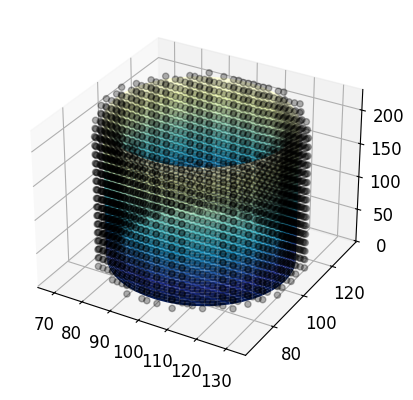

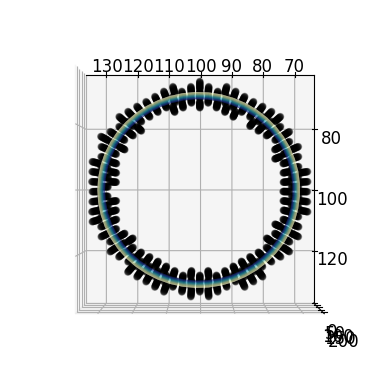

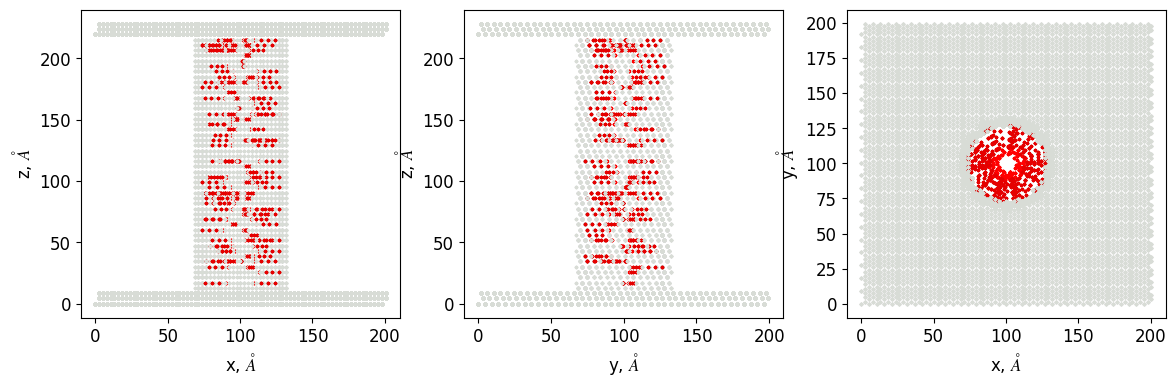

In [5]:
# build system using input file information
NewSystem = Grafting.NewSystem(root=f"{ROOT}")   # instantiate new system class and set the working directory
NewSystem.read_inputs_grafter(f'{ROOT}/Grafter/input_grafter.json')  # read input parameters
NewSystem.graft_matrix()  # graft matrix with parameters from input
NewSystem.out_gro(fname="initial_config.gro") # save the final configuration to a .gro file

# Plot system to check
NewSystem.plot_system(colors={"END":"red","C1":"xkcd:red","N1L":"xkcd:light gray","N1L1":"xkcd:light gray","N1B":"xkcd:light gray"})
print(" ")

In [6]:
# Input for assembling system with pistons

data = {
    "folder": f"{FOLDER}",
    "blocks": [
        "piston1.gro",
        "initial_config.gro",
        "piston2.gro"
    ],
    "positions": [
        [0,0,100],
        [0,0,100+2+220],
        [0,0,100+2*2+220*2+200]
    ],
    "box dimensions": [
        200.4700, 197.9800, 100+2*2+220*2+200+100,90,90,90
    ],
    "transforms": False,
    "name": "MONO",
    "out name": "assembled.gro"
}

# save options to input file
with open(f'{ROOT}/Grafter/input_assembler.json', 'w', encoding='utf-8') as f:
        json.dump(data, f, ensure_ascii=False, indent=4)

print("Input file created.")

Input file created.



name: MONO
root: /Users/frasera/Ricerca/scripts/MONO
blocks: ['piston1.gro', 'initial_config.gro', 'piston2.gro']
positions: [[  0   0 100]
 [  0   0 322]
 [  0   0 744]]
box: [200.47, 197.98, 844, 90, 90, 90]
transformations: [None, None, None]
out name: assembled.gro


.*.*.*.*.*.*.*.*.*.*.*.
Starting assembling

name:  MONO 
root:  None 
blocks:  ['piston1.gro', 'initial_config.gro', 'piston2.gro'] 
positions:  [[  0   0 100]
 [  0   0 322]
 [  0   0 744]] 
box:  [200.47, 197.98, 844, 90, 90, 90] 
transformations:  [None, None, None] 
out name:  assembled.gro 

Finished assembling (:
.*.*.*.*.*.*.*.*.*.*.*.


File 'lay-sil.itp' generated successfully.
 


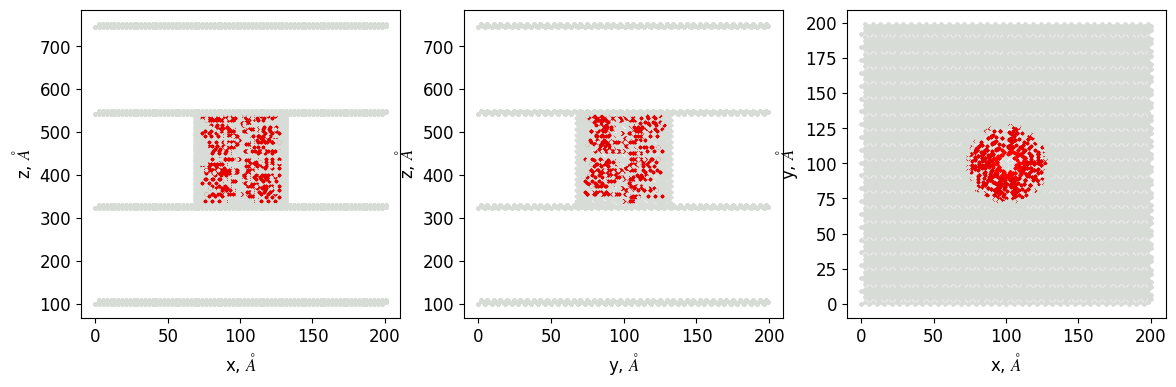

In [7]:
# Read input file and run assembler

NewSystem.read_inputs_assembler(f'{ROOT}/Grafter/input_assembler.json')
NewSystem.run_assembler()

# data to build the topology files for GROMACS

s1 =[{"atom": "END", "res": "SIL", "type": "C2", "charge": 0.0, "mass": 72.0}]
s2 = [ {"atom": "C1", "res": "SIL", "type": "C1", "charge": 0.0, "mass": 72.0} for i in range(MOL_SIZE-1)] 
s3 = [{"atom": "N1L1", "res": "LAY", "type": "N1L1", "charge": 0.0, "mass": 72.0}]
sil_atoms = s1 + s2 + s3

bulk_atom = {"name": "BULK", "atom": "N1B", "res": "BULK", "type": "N1B", "charge": 0.0, "mass": 72.0}
lay_atom = {"name": "LAY", "atom": "N1L", "res": "LAY", "type": "N1L", "charge": 0.0, "mass": 72.0}
pis1_atom = {"name": "PIS1", "atom": "N1P", "res": "PIS1", "type": "N1P", "charge": 0.0, "mass": 72.0}
pis2_atom =  {"name": "PIS", "atom": "N1P", "res": "PIS2", "type": "N1P", "charge": 0.0, "mass": 72.0}

# Constructing the molecules list
molecules = [
    {
        "name": f"SIL{MOL_SIZE}",
        "atoms": sil_atoms,
        "bonds": [{"id1": i, "id2": i + 1, "funct": 1} for i in range(1, len(sil_atoms))],
        "angles": [{"i": i, "j": i + 1, "k": i + 2, "funct": 2} for i in range(1, len(sil_atoms) - 2)]
    },
    {
        "name": "LAY",
        "atoms": [lay_atom],
    },
    {
        "name": "BULK",
        "atoms": [bulk_atom],
    },
    {
        "name": "PIS1",
        "atoms": [pis1_atom],
    },
    {
        "name": "PIS2",
        "atoms": [pis2_atom],
    }
]

# Generate .itp file
NewSystem.make_itp_sil(molecules=molecules, out_name="lay-sil.itp")

# Generate .top file
includes = ['#include "martini_v3.0.0_N1Lay.itp"', 
            '#include "itps/martini_v3.0.0_solvents_v1.itp"', 
            '#include "lay1-sil.itp"', '#include "itps/surf.itp"',
            '#include "itps/martini_v3.0.0_small_molecules_v1.itp"']

NewSystem.out_topology(fname="initial_config.gro", includes=includes, out_name="topol.top")

# Plot system to check
NewSystem.plot_system(colors={"END":"red","C1":"xkcd:red","N1L":"xkcd:light gray","N1L1":"xkcd:light gray","N1B":"xkcd:light gray","N1P":"xkcd:light gray"})
print(" ")

<Axes: xlabel='N', ylabel='Count'>

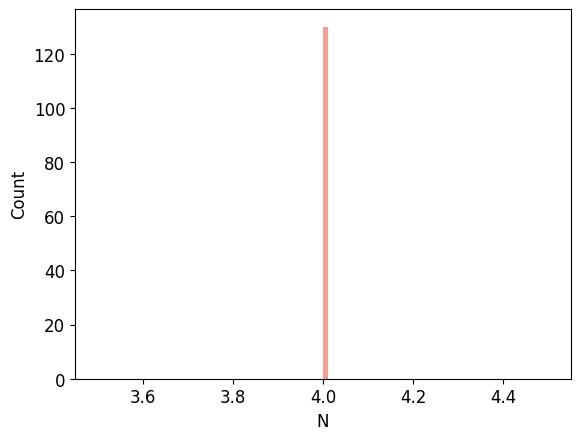

In [8]:
NewSystem.plot_mol_distribution() # plot distribution of chain sizes